Installing Libraries

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.pyplot import figure

from matplotlib import rcParams
import seaborn as sns

import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import datetime
from datetime import datetime



Styling

In [73]:
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

Loading the data

In [74]:
df = pd.read_csv("MachineLearning-PSIFbyHighRiskExposure_PSIFIncidentsbyHRE_2023-02-02-16-59-35.csv",delimiter=',')


#Preliminary Analysis

In [75]:
df.columns

Index(['Record No.', 'System Type', 'Date', 'Location', 'High Risk Exposures'], dtype='object')

In [76]:
df.head(5)

,Record No.,System Type,Date,Location,High Risk Exposures
0,1148,Near Miss / Property Damage,1/7/2020 2:15:00 PM,OSE Rocky Mount,Fire
1,701,Near Miss / Property Damage,1/20/2020 9:00:00 AM,CCI Transportation,Dropped/Falling Object
2,1145,Near Miss / Property Damage,1/21/2020 11:00:00 AM,OSE Kernersville,Struck By/Moving Equipment (inc. Mobile/Rail)
3,1145,Near Miss / Property Damage,1/21/2020 11:00:00 AM,OSE Kernersville,Dropped/Falling Object
4,1150,Near Miss / Property Damage,1/24/2020 12:30:00 AM,OSE Rocky Mount,Fire


In [77]:
df.describe()

,Record No.
count,1218.000000
mean,2309.297209
std,1373.870643
min,5.000000
25%,1167.250000
50%,2244.000000
75%,3441.000000
max,4781.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Record No.           1218 non-null   int64 
 1   System Type          1218 non-null   object
 2   Date                 1218 non-null   object
 3   Location             1218 non-null   object
 4   High Risk Exposures  1218 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.7+ KB


In [79]:
df.isna()

,Record No.,System Type,Date,Location,High Risk Exposures
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1213,False,False,False,False,False
1214,False,False,False,False,False
1215,False,False,False,False,False
1216,False,False,False,False,False


In [80]:
df.isna().sum()


Record No.             0
System Type            0
Date                   0
Location               0
High Risk Exposures    0
dtype: int64

In [81]:
df.nunique()

Record No.             1026
System Type               2
Date                   1015
Location                116
High Risk Exposures      12
dtype: int64

In [82]:
df.duplicated().sum()

0

#Univariate analysis

In [83]:
df["System Type"].value_counts()


Near Miss / Property Damage    960
Injury/Illness                 258
Name: System Type, dtype: int64

In [84]:
df["System Type"].value_counts(normalize = True)

Near Miss / Property Damage    0.788177
Injury/Illness                 0.211823
Name: System Type, dtype: float64

In [85]:
df["Location"].value_counts()

NM Mexico                47
CCI Transportation       44
Butler Melting           41
Vulcan                   37
NM Fallon                34
                         ..
NOD Ecorse                1
SMD Division Services     1
MD Coldwater              1
SID Heartland             1
Colombia                  1
Name: Location, Length: 116, dtype: int64

In [86]:
df["Location"].value_counts(normalize = True).head(10)

NM Mexico                   0.038588
CCI Transportation          0.036125
Butler Melting              0.033662
Vulcan                      0.030378
NM Fallon                   0.027915
Heartland - Production      0.025452
Superior Aluminum Alloys    0.024631
RB Melt/Cast                0.023810
Butler Hot Mill             0.023810
PIT Rolling Mill            0.022989
Name: Location, dtype: float64

In [87]:
df["High Risk Exposures"].value_counts()

Struck By/Moving Equipment (inc. Mobile/Rail)    259
Dropped/Falling Object                           244
Lifting/Rigging (inc. Cranes)                    165
Hazardous Energy (inc. LOTOTO)                   113
Caught In/Between (inc. Machine Guarding)        104
Fall Exposure (inc. Fall Protection)              69
Explosion/Projectiles                             66
Fire                                              65
Other High Risk Exposure                          58
Hot Metal                                         52
Atmospheric Hazards (inc. Confined Space)         13
Power Tools                                       10
Name: High Risk Exposures, dtype: int64

In [88]:
df["High Risk Exposures"].value_counts(normalize = True)

Struck By/Moving Equipment (inc. Mobile/Rail)    0.212644
Dropped/Falling Object                           0.200328
Lifting/Rigging (inc. Cranes)                    0.135468
Hazardous Energy (inc. LOTOTO)                   0.092775
Caught In/Between (inc. Machine Guarding)        0.085386
Fall Exposure (inc. Fall Protection)             0.056650
Explosion/Projectiles                            0.054187
Fire                                             0.053366
Other High Risk Exposure                         0.047619
Hot Metal                                        0.042693
Atmospheric Hazards (inc. Confined Space)        0.010673
Power Tools                                      0.008210
Name: High Risk Exposures, dtype: float64

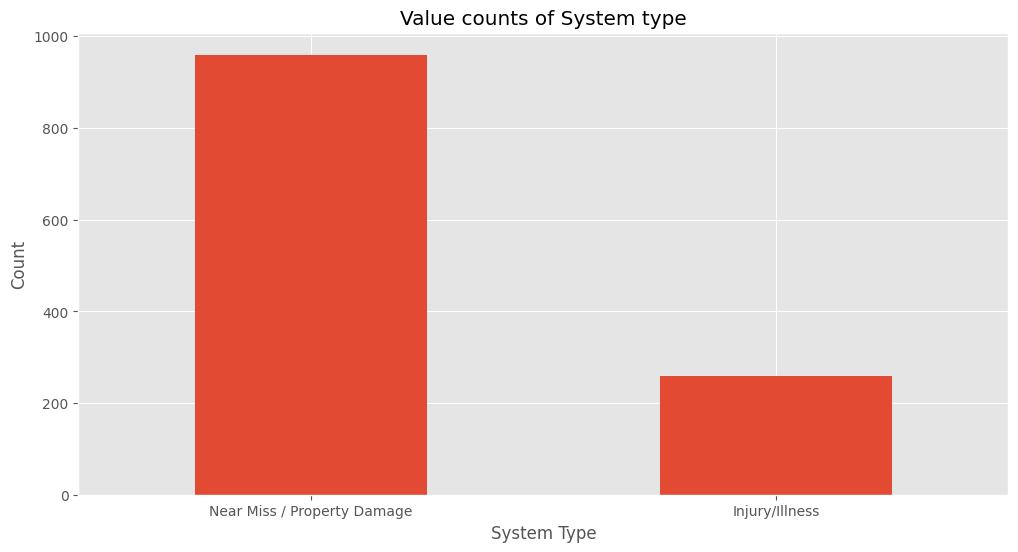

In [89]:
df["System Type"].value_counts().plot(kind="bar")
plt.title("Value counts of System type")
plt.xlabel("System Type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

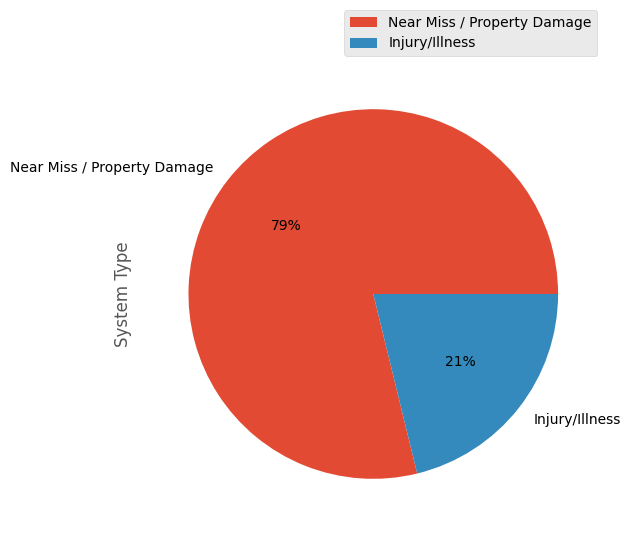

In [90]:
df["System Type"].value_counts().plot(kind='pie', y='System type', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1,1), loc="lower right")
plt.show()

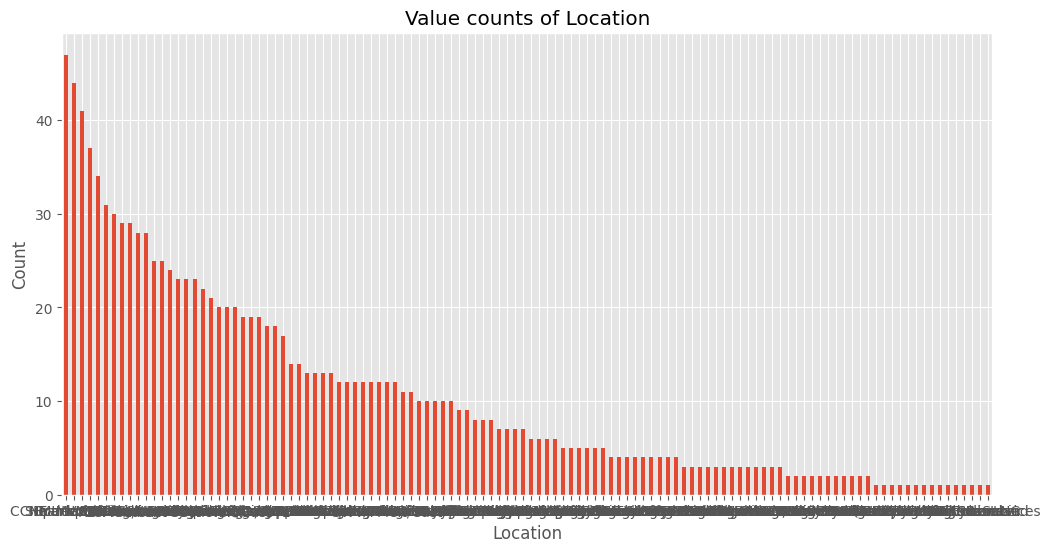

In [91]:
df["Location"].value_counts().plot(kind="bar")
plt.title("Value counts of Location")
plt.xlabel("Location")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

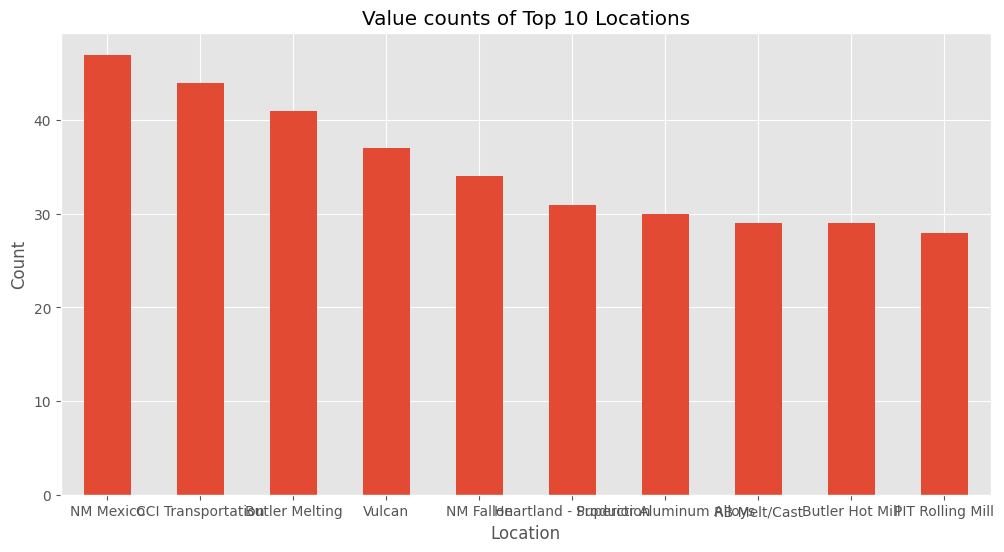

In [92]:
df["Location"].value_counts().head(10).plot(kind="bar")
plt.title("Value counts of Top 10 Locations")
plt.xlabel("Location")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

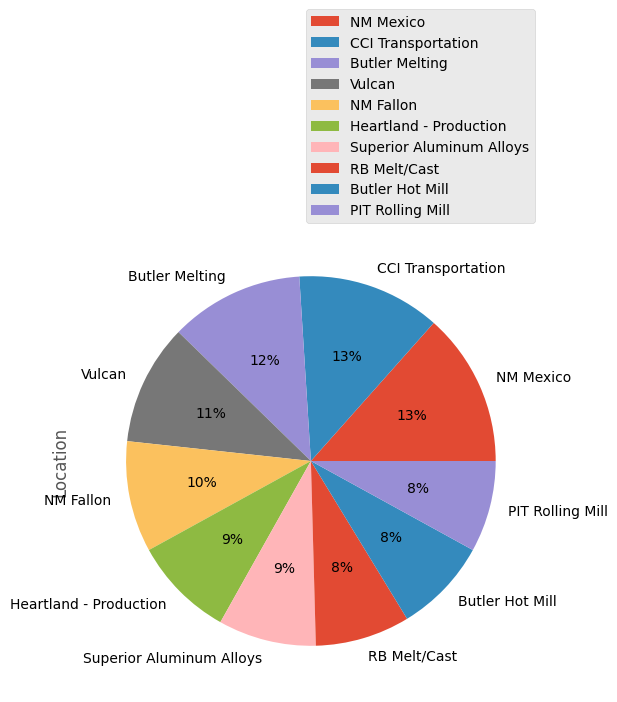

In [93]:
df["Location"].value_counts(normalize = True).head(10).plot(kind='pie', y='Top 10 Locations', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1,1), loc="lower right")
plt.show()

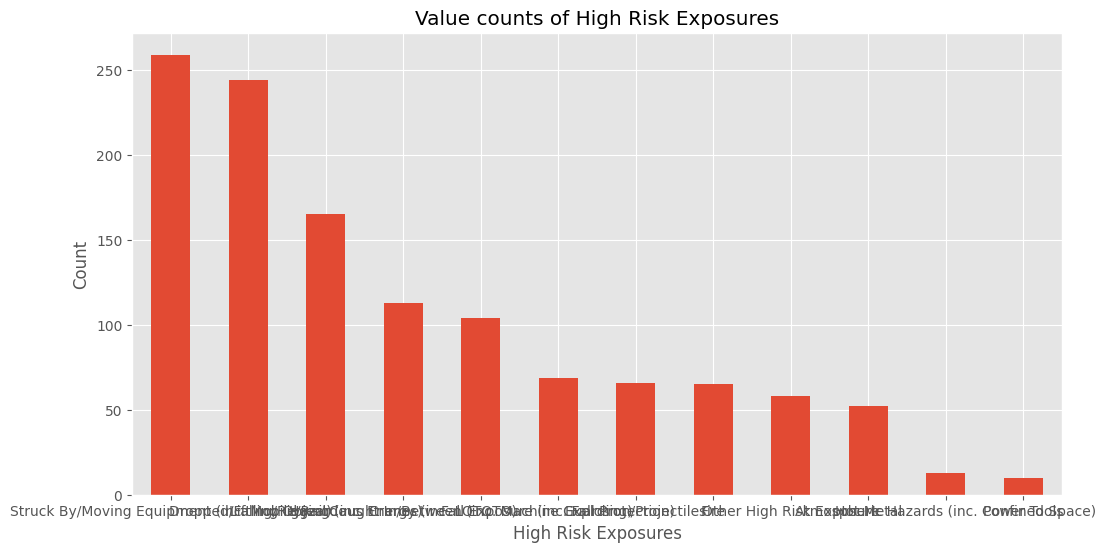

In [94]:
df["High Risk Exposures"].value_counts().plot(kind="bar")
plt.title("Value counts of High Risk Exposures")
plt.xlabel("High Risk Exposures")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show() 

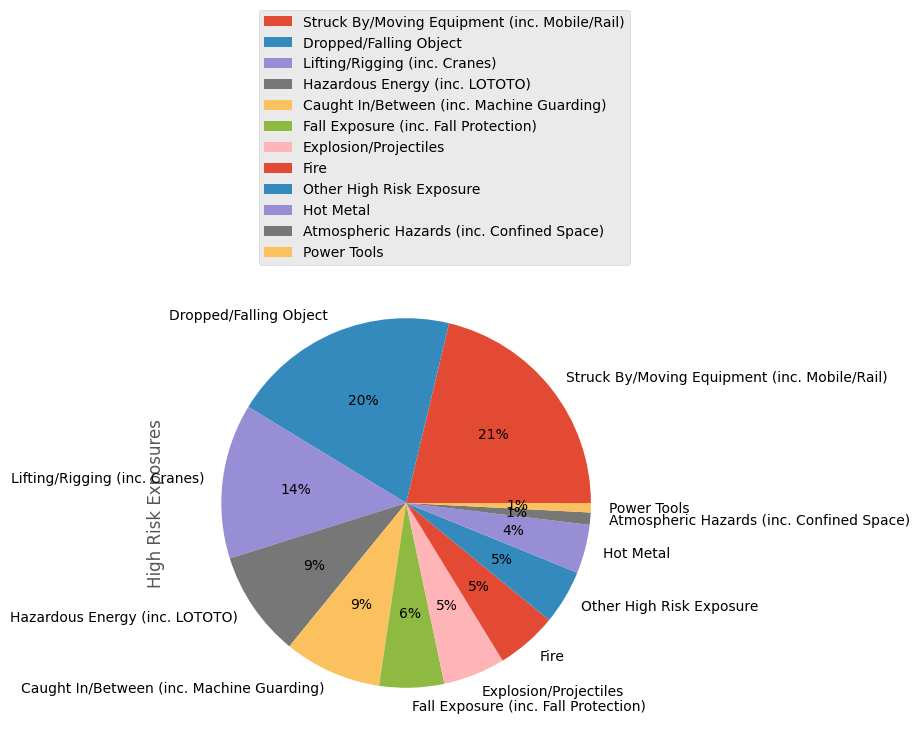

In [95]:
df["High Risk Exposures"].value_counts().plot(kind='pie', y='High Risk Exposures', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1,1), loc="lower right")
plt.show()

Extracting only date from df and adding it to a new dataframe to analyze the incidents over the years

In [173]:
data = pd.DataFrame()
# data["Date"] = pd.to_datetime(df["Date"])

# data.info()
# data.head(5)

data['time'] = pd.to_datetime(df['Date']).dt.date
data.head(5)



,time
0,2020-01-07
1,2020-01-20
2,2020-01-21
3,2020-01-21
4,2020-01-24


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    1218 non-null   object
dtypes: object(1)
memory usage: 9.6+ KB


In [175]:
data.nunique()


time    624
dtype: int64

In [183]:
data['time'].value_counts()

2021-03-12    9
2022-03-14    8
2022-08-30    8
2021-11-15    7
2022-02-10    6
             ..
2021-06-03    1
2021-06-02    1
2021-05-31    1
2021-05-27    1
2021-09-10    1
Name: time, Length: 624, dtype: int64

<AxesSubplot: xlabel='time'>

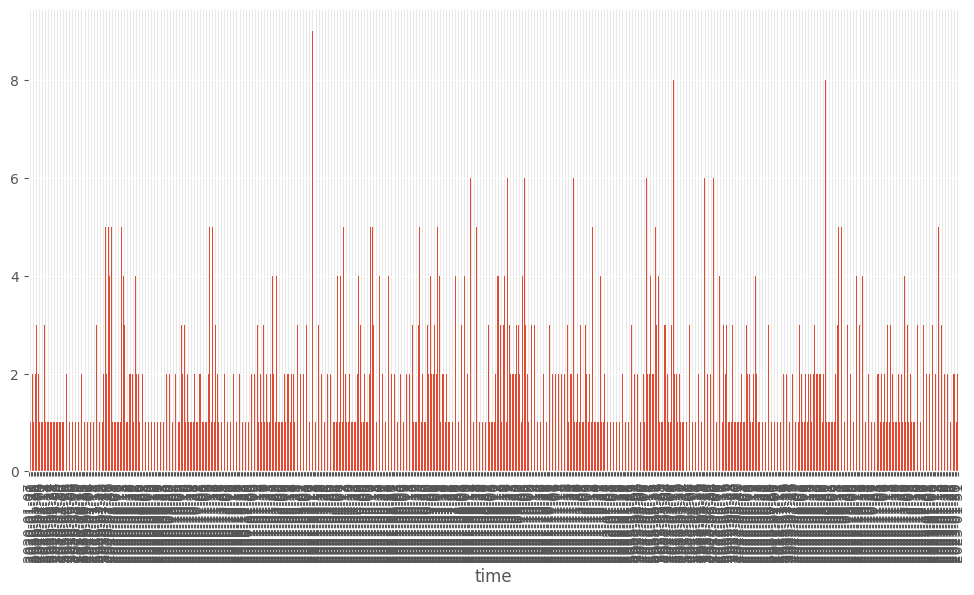

In [115]:
data.groupby('time').size().plot(kind = 'bar')

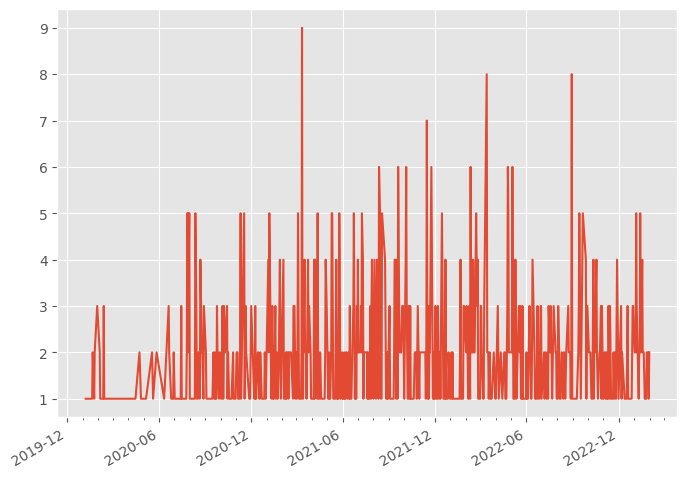

In [184]:
fig, ax = plt.subplots(figsize=(8, 6))
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(data["time"].unique(), data["time"].value_counts(sort=False))
fig.autofmt_xdate()
